# Исследование сервиса аренды самокатов GoFast

В основе исследования популярного сервиса аренды самокатов GoFast лежат данные о некоторых пользователях из нескольких городов, а также об их поездках. 

**Целью исследования** является анализ данных и проверка гипотез, которые могут помочь бизнесу вырасти.
    
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки:
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra:
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

**Описание данных**
    
В данных содержится информация о пользователях, их поездках и подписках.
    
   
Пользователи: 

- `user_id` — уникальный идентификатор пользователя

- `name` — имя пользователя

- `age` — возраст

- `city` — город

- `subscription_type` — тип подписки (free, ultra)

   
Поездки:

- `user_id` — уникальный идентификатор пользователя

- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)

- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

- `date` — дата совершения поездки

   
Подписки:

- `subscription_type` — тип подписки

- `minute_price` — стоимость одной минуты поездки по данной подписке

- `start_ride_price` — стоимость начала поездки

- `subscription_fee` — стоимость ежемесячного платежа

**План работы**

1. Изучение данных:
- считывание трёх файлов с данными и сохранение их в датафреймы;
- вывод первых строк каждого набора данных;
- изучение общей информации о каждом датафрейме.
2. Предобработка данных:
- приведение столбца `date` к типу даты pandas;
- создание нового столбца с номером месяца на основе столбца `date`;
- поиск и обработка пропущенных значений и дубликатов в датафреймах.
3. Исследовательский анализ данных:
- описание и визуализация общей информации о пользователях и поездках:
 - частота встречаемости городов;
 - соотношение пользователей с подпиской и без подписки;
 - возраст пользователей;
 - расстояние, которое пользователь преодолел за одну поездку;
 - продолжительность поездок.
4. Объединение данных:
- объединение данных о пользователях, поездках и подписках в один датафрейм;
- создание двух новых датафреймов:
 - c данными о пользователях без подписки;
 - с данными о пользователях с подпиской;
- визуализация информации о расстоянии и времени поездок для пользователей без подписки и с подпиской.
5. Подсчёт выручки:
- округление до следующего целого числа продолжительности каждой поездки для подсчёта стоимости;
- создание датафрейма с агрегированными данными о поездках:
 - суммарное расстояние;
 - количество поездок;
 - суммарное время для каждого пользователя за каждый месяц;
- добавление в датафрейм с агрегированными данными о поездках столбца с помесячной выручкой, которую принёс каждый пользователь;
- подсчёт выручки от пользователей без подписки и с подпиской.
6. Проверка гипотез:
- «пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки»;
- «среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров»;
- «помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки»;
- определение теста, который бы понадобился для проверки гипотезы:
 - «количество обращений в техподдержку снизилось после обновления серверов, с которыми взаимодействует мобильное приложение».
7. Написание промежуточных выводов и общего вывода по результатам исследования.

## Загрузка данных и изучение общей информации

### Cчитывание и сохранение файлов с данными в датафреймы

Импортируем необходимые библиотеки и модули.

In [7]:
import pandas as pd 
# импорт библиотеки pandas
from matplotlib import pyplot as plt 
# импорт модуля pyplot из библиотеки matplotlib
%matplotlib inline
import numpy as np
# импорт библиотеки numpy
import scipy.stats as st
# импорт модуля stats из библиотеки scipy

Считаем данные из файлов в датафреймы и сохраним в переменные `data_users_go`, `data_rides_go`, `data_subscriptions_go`.

In [9]:
try:
    data_users_go = pd.read_csv('/datasets/users_go.csv')
except:
    data_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
#  чтение данных из csv-файла в датафрейм и сохранение в переменную ‘data_users_go’

try:
    data_rides_go = pd.read_csv('/datasets/rides_go.csv')
except:
    data_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
#  чтение данных из csv-файла в датафрейм и сохранение в переменную ‘data_rides_go’

try:
    data_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
#  чтение данных из csv-файла в датафрейм и сохранение в переменную ‘data_subscriptions_go’

### Вывод первых строк каждого набора данных

Выведем первые 5 строк датафрейма `data_users_go` на экран.

In [12]:
data_users_go.head() 
# отображение первых 5 строк датафрейма ‘data_users_go’

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Выведем первые 5 строк датафрейма `data_rides_go` на экран.

In [14]:
data_rides_go.head() 
# отображение первых 5 строк датафрейма ‘data_rides_go’

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Выведем строки датафрейма `data_subscriptions_go` на экран.

In [16]:
data_subscriptions_go.head() 
# отображение строк датафрейма ‘data_subscriptions_go’

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Изучение общей информации о каждом датафрейме

Выведем основную информацию о датафрейме `data_users_go`.

In [19]:
data_users_go.info() 
# вывод информации о структуре данных, хранящихся в переменной ‘data_users_go’

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В таблице 1 тыс. 565 строк и 5 столбцов. Две колонки содержат целые числа (`'user_id'`, `'age'`), три — строки (`'name'`, `'city'`, `'subscription_type'`). Во всех колонках отсутствуют пропущенные значения.

Выведем основную информацию о датафрейме `data_rides_go`.

In [22]:
data_rides_go.info() 
# вывод информации о структуре данных, хранящихся в переменной ‘data_rides_go’

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В таблице 18 тыс. 68 строк и 4 столбца. Две колонки содержат вещественные числа (`'distance'`, `'duration'`), одна колонка — целые числа (`'user_id'`), одна колонка — строки (`'date'`). Во всех колонках отсутствуют пропущенные значения.

Выведем основную информацию о датафрейме `data_subscriptions_go`.

In [25]:
data_subscriptions_go.info() 
# вывод информации о структуре данных, хранящихся в переменной ‘data_subscriptions_go’

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


В таблице 2 строки и 4 столбца. Три колонки содержат целые числа (`'minute_price'`, `'start_ride_price'`, `'subscription_fee'`), одна колонка — строки (`'subscription_type'`). Во всех колонках отсутствуют пропущенные значения.

### Вывод

Мы считали csv-файлы с данными о пользователях сервиса аренды самокатов GoFast, их поездках и подписках, сохранили их в датафреймы. Вывели первые строки каждого набора данных. 
Изучили общую информацию о каждом датафрейме:
- в датафрейме, содержащем сведения о пользователях, 1 тыс. 565 строк и 5 столбцов, из которых 2 содержат целые числа, 3 — строки;
- в датафрейме с информацией о поездках 18 тыс. 68 строк и 4 столбца, из которых 2 содержат вещественные числа, 1 — целые числа, 1 — строки;
- в датафрейме, содержащем информацию о подписках, 2 строки и 4 столбца, из которых 3 содержат целые числа, 1 — строки.

## Предобработка данных

### Изменение типа данных

Преобразуем строки в даты в столбце `'date'` датафрейма `data_rides_go`, где указаны даты совершения поездки, чтобы иметь возможность выполнять различные операции с данными, связанными с датами.

In [32]:
data_rides_go['date'] = pd.to_datetime(data_rides_go['date'], format='%Y-%m-%d')
# преобразование строк колонки ‘date’ в даты

Проверим, изменился ли тип данных в столбце с датами совершения поездки.

In [34]:
data_rides_go[['date']].dtypes.to_frame(name='data type')
# вывод информации о типе данных в колонке ‘date’

,data type
date,datetime64[ns]


Столбец `'date'` приведён к типу даты pandas.

Посмотрим, за какие года предоставлены данные о поездках пользователей сервиса аренды самокатов GoFast.

In [36]:
data_rides_go['date'].dt.year.unique()
# получение списка уникальных значений года из столбца ‘date’

array([2021])

Данные о поездках на самокатах пользователей сервиса GoFast предоставлены за 2021 год.

### Добавление в датафрейм столбца с месяцами

Создадим новый столбец с номером месяца на основе столбца `'date'`.

In [40]:
data_rides_go['month'] = data_rides_go['date'].dt.month
# добавление столбца ‘month’ в датафрейм ‘data_rides_go’, 
# который содержит месяц для каждой даты столбца ‘date’

Убедимся, что новый столбец добавлен в датафрейм `data_rides_go`.

In [42]:
data_rides_go.columns 
# вывод списка столбцов в датафрейме ‘data_rides_go’

Index(['user_id', 'distance', 'duration', 'date', 'month'], dtype='object')

Теперь в датафрейме `data_rides_go` 5 столбцов.

### Поиск пропущенных значений

Выведем количество пропущенных значений для каждого столбца датафрейма `data_users_go`.

In [46]:
data_users_go.isna().sum().to_frame(name='count')
# вычисление количества отсутствующих значений (NaN) в каждом столбце датафрейма

,count
user_id,0
name,0
age,0
city,0
subscription_type,0


Во всех столбцах датафрейма `data_users_go` отсутствуют пропущенные значения.

Выведем количество пропущенных значений для каждого столбца датафрейма `data_rides_go`.

In [49]:
data_rides_go.isna().sum().to_frame(name='count')
# вычисление количества отсутствующих значений в каждом столбце датафрейма

,count
user_id,0
distance,0
duration,0
date,0
month,0


Во всех столбцах датафрейма `data_rides_go` отсутствуют пропущенные значения.

Выведем количество пропущенных значений для каждого столбца датафрейма `data_subscriptions_go`.

In [52]:
data_subscriptions_go.isna().sum().to_frame(name='count')
# вычисление количества отсутствующих значений в каждом столбце датафрейма

,count
subscription_type,0
minute_price,0
start_ride_price,0
subscription_fee,0


Во всех столбцах датафрейма `data_subscriptions_go` отсутствуют пропущенные значения.

### Поиск и обработка дубликатов

Выведем число дубликатов в датафрейме `data_users_go`.

In [56]:
data_users_go.duplicated().sum() 
# вычисление количества дубликатов в датафрейме ‘data_users_go’

31

В датафрейме `data_users_go` существует 31 дубликат. Удалим одинаковые записи.

In [58]:
data_users_go.drop_duplicates(inplace=True)
# удаление дубликатов строк из датафрейма ‘data_users_go’

Убедимся, что теперь в датафрейме `data_users_go` нет дубликатов.

In [60]:
data_users_go.duplicated().sum() 
# вычисление количества дубликатов в датафрейме ‘data_users_go’

0

Дубликаты в датафрейме `data_users_go` отсутствуют.

Выведем число дубликатов в датафрейме `data_rides_go`.

In [63]:
data_rides_go.duplicated().sum() 
# вычисление количества дубликатов в датафрейме ‘data_rides_go’

0

Дубликаты в датафрейме `data_rides_go` отсутствуют.

Выведем число дубликатов в датафрейме `data_subscriptions_go`.

In [66]:
data_subscriptions_go.duplicated().sum() 
# вычисление количества дубликатов в датафрейме ‘data_subscriptions_go’

0

Дубликаты в датафрейме `data_subscriptions_go` отсутствуют.

Выведем основную информацию о датафрейме `data_users_go` после предобработки данных.

In [69]:
data_users_go.info()
# вывод информации о структуре данных, хранящихся в переменной ‘data_users_go’

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


Выведем основную информацию о датафрейме `data_rides_go` после предобработки данных.

In [71]:
data_rides_go.info()
# вывод информации о структуре данных, хранящихся в переменной ‘data_rides_go’

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1)
memory usage: 635.3 KB


### Вывод

- Привели столбец с датами совершения пользователями поездок на самокате к типу даты pandas. 
- Добавили в датафрейм с поездками дополнительный столбец с номерами месяцев. 
- Убедились, что во всех датафреймах отсутствуют пропущенные значения. 
- Обнаружили, что в датафрейме с информацией о пользователях существует 31 явный дубликат. Удалили одинаковые записи. 
- В других датафреймах не были найдены дублирующиеся записи.

## Исследовательский анализ данных

### Частота встречаемости городов

Изучим частоту встречаемости городов, в которых пользователи сервиса GoFast совершают поездки на самокатах. Построим столбчатую диаграмму, показывающую количество пользователей сервиса аренды самокатов GoFast в определённом городе.

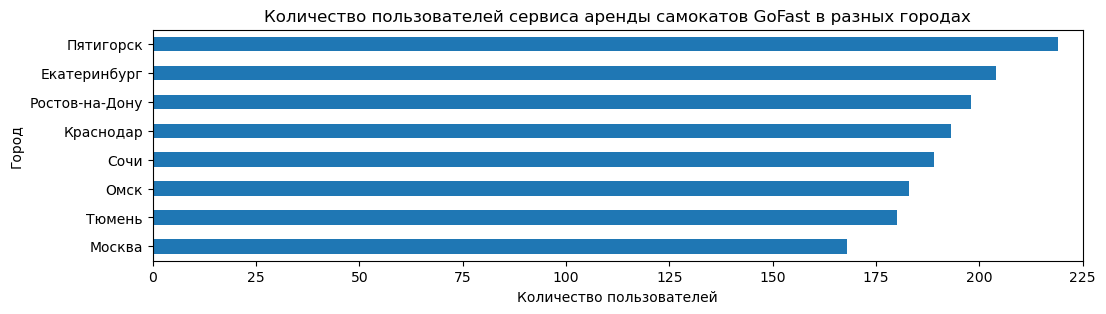

,count
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [77]:
rating_of_cities = data_users_go['city'].value_counts()
# подсчёт количества уникальных значений в столбце ‘city’ датафрейма ‘data_users_go’
rating_of_cities.sort_values().plot(kind='barh', figsize=(12, 3), legend=False)
# построение горизонтального столбчатого графика 
# с отсортированными по убыванию данными из ‘rating_of_cities’
plt.xlim(0, 225)
# установка границ горизонтальной оси
plt.title('Количество пользователей сервиса аренды самокатов GoFast в разных городах', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Количество пользователей', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Город', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика
rating_of_cities.to_frame()
# вывод количества вхождений каждого значения в столбце ‘city’ в датафрейме ‘data_users_go’

Сервис аренды самокатов GoFast представлен в 8 городах, таких как Москва, Екатеринбург, Ростов-на-Дону, Краснодар, Омск, Тюмень, Сочи, Пятигорск. Во всех городах примерно одинаковое количество пользователей сервиса GoFast, совершающих поездки на самокатах. 

В Екатеринбурге 204 пользователя сервиса GoFast совершают поездки на самокатах, в Ростове-на-Дону — 198 чел., в Краснодаре — 193 чел., в Сочи — 189 чел., в Омске — 183 чел., в Тюмени — 180 чел.

Наибольшее число пользователей сервиса совершают поездки в Пятигорске — 219 чел., наименьшее число в Москве — 168 чел.

Возможные причины более широкого использования самокатов в Пятигорске по сравнению с Москвой:
- В Москве может быть более развитая инфраструктура общественного транспорта, что снижает потребность в использовании самокатов, в то время как в Пятигорске инфраструктура может быть менее развита, и самокаты могут служить альтернативой общественному транспорту;
- В Москве по сравнению с другими городами может быть больше сервисов-конкурентов аренды самокатов, забирающих часть потенциальных клиентов;
- Москва расположена в более холодном климатическом поясе, что может ограничивать использование самокатов в зимнее время года, Пятигорск же находится в более мягком климате, что делает самокаты более популярными в течение всего года;
- Пятигорск расположен в гористой местности, что делает использование самокатов более удобным и привлекательным для жителей города, Москва имеет преимущественно равнинный рельеф, что может снижать интерес к самокатам;
- В Москве могут быть более строгие правила и нормы использования самокатов.

### Cоотношение пользователей с подпиской и без подписки

Посмотрим на соотношение клиентов сервиса аренды самокатов GoFast, пользующихся мобильным приложением без подписки и с подпиской.

In [81]:
ratio_of_subscription_types = data_users_go['subscription_type'].value_counts()
ratio_of_subscription_types.to_frame()
# вывод количества вхождений каждого значения в столбце ‘subscription_type’ в датафрейме ‘data_users_go’

,count
subscription_type,
free,835
ultra,699


Большая часть клиентов сервиса аренды самокатов GoFast пользуется мобильным приложением без подписки — 835 человек. Меньшее число клиентов сервиса пользуется мобильным приложением с подпиской — 699 человек.
    
Построим круговую диаграмму, показывающую процентное соотношение пользователей сервиса аренды самокатов GoFast без подписки и с подпиской.

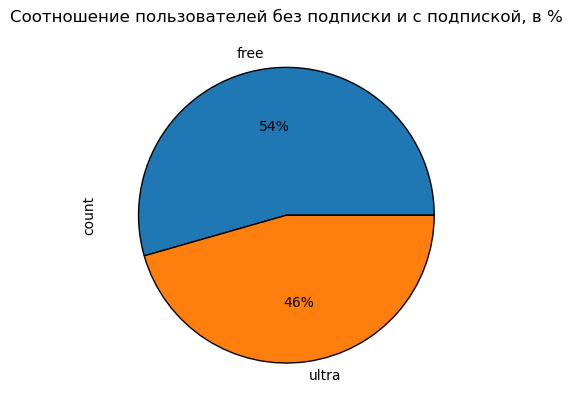

In [83]:
ratio_of_subscription_types.plot(kind='pie', autopct='%1.0f%%', wedgeprops=
       {'edgecolor':'black'}, legend=False)
# создание круговой диаграммы на основе данных в переменной ‘ratio_of_subscription_types’
plt.title('Cоотношение пользователей без подписки и с подпиской, в %', 
          fontsize=12)
# установка заголовка для графика
plt.show()
# отображение графика

Более половины клиентов сервиса аренды самокатов GoFast (54%) пользуются мобильным приложением без оформления подписки. Чуть меньше половины (46%) клиентов для совершения поездок на самокатах используют подписку Ultra, но тем не менее это хорошая рабочая база клиентов.

### Возраст пользователей

Выведем характеристики распределения возрастов пользователей сервиса аренды самокатов GoFast и построим диаграмму размаха.

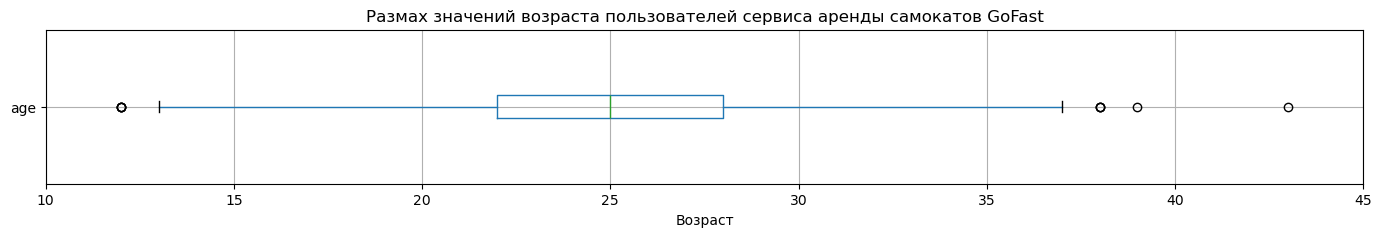

,age
count,1534.0
mean,25.0
std,5.0
min,12.0
25%,22.0
50%,25.0
75%,28.0
max,43.0


In [87]:
data_users_go.boxplot('age', vert = False, figsize=(17, 2))
# построение диаграммы размаха для значений столбца ‘age’
plt.xlim(10, 45)
# установка границ горизонтальной оси
plt.title('Размах значений возраста пользователей сервиса аренды самокатов GoFast', fontsize=12)
# установка заголовка для графика
plt.xlabel('Возраст', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика
round(data_users_go['age'].describe()).to_frame()
# вывод статистической информации о значениях столбца ‘age’ с округлением

Количество пользователей сервиса аренды самокатов GoFast в 2021 году составляет 1 тыс. 534 чел.

Cредний возраст пользователей сервиса равен 25 годам.

Стандартное отклонение, описывающее разброс значений возраста пользователей сервиса относительно среднего, равно 5 годам.

Первый квартиль, левее которого лежит 25% данных, описывающих возраст пользователей, равен 22 годам.

Половина всех значений возраста пользователей меньше 25 лет, другая половина — больше.

Третий квартиль, правее которого лежит 25% данных, описывающих возраст пользователей, равен 28 годам.

Нижний «ус» диаграммы размаха доходит до 13 лет, верхний «ус» — до 37 лет. Это приблизительные границы нормального размаха. То, что выходит за их пределы, считается выбросами. Они включают в себя самый маленький возраст — 12 лет и самый больший возраст — 43 года.

Определим возраст пользователей сервиса GoFast, который встречается наиболее часто.

In [89]:
data_users_go['age'].mode().to_frame()
# вычисление моды в столбце ‘age’

,age
0,25


Наиболее часто встречающийся возраст пользователей сервиса аренды самокатов GoFast — 25 лет.
    
Построим гистограмму распределения возрастов пользователей сервиса GoFast.

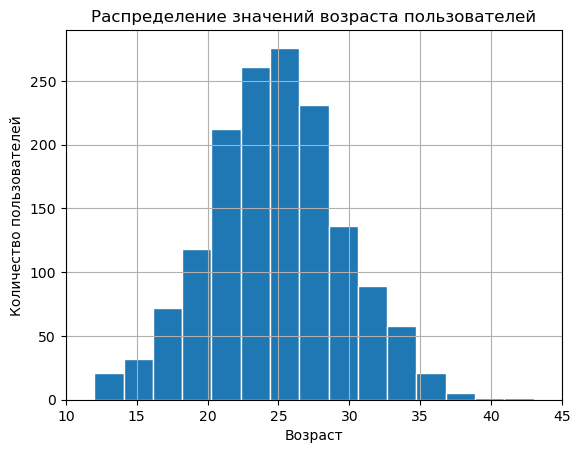

In [91]:
data_users_go['age'].hist(bins=15, ec='white', legend=False)
# построение гистограммы для значений в столбце ‘age’ в датафрейме ‘data_users_go’
plt.xlim(10, 45)
# установка границ горизонтальной оси
plt.title('Распределение значений возраста пользователей', fontsize=12)
# установка заголовка для графика
plt.xlabel('Возраст', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Количество пользователей', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Сервис аренды самокатов GoFast наиболее популярен среди молодежи в возрасте от 22 до 28 лет. Мода, медиана и среднее арифметическое совпадают — 25 лет. Распределение является симметричным. Реже всего сервисом пользуются лица моложе 15 и старше 35 лет. Самому юному пользователю сервиса — 12 лет, самому старшему — 43 года.

### Расстояние, которое пользователи преодолели за одну поездку

Выведем характеристики распределения расстояний, которые пользователи сервиса GoFast преодолели за одну поездку, и построим диаграмму размаха.

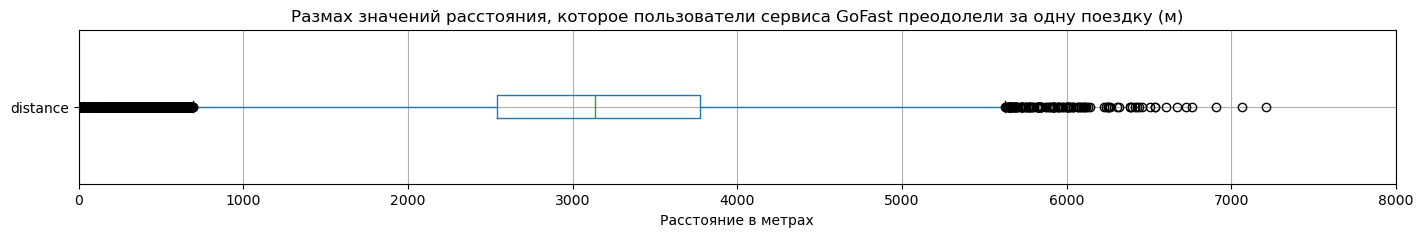

,distance
count,18068.0
mean,3070.7
std,1116.8
min,0.9
25%,2543.2
50%,3133.6
75%,3776.2
max,7211.0


In [95]:
data_rides_go.boxplot('distance', vert = False, figsize=(17, 2))
# построение диаграммы размаха для значений столбца ‘distance’
plt.xlim(0, 8000)
# установка границ горизонтальной оси
plt.title('Размах значений расстояния, которое пользователи сервиса GoFast преодолели за одну поездку (м)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Расстояние в метрах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика
round(data_rides_go['distance'].describe().to_frame(), 1)
# вывод статистической информации о значениях столбца ‘distance’

Количество поездок, совершённых пользователями сервиса аренды самокатов GoFast за 2021 год, составляет 18 тыс. 68.

Cреднее расстояние, которое пользователи сервиса GoFast преодолели за одну поездку, равно 3 км 71 м.

Стандартное отклонение, описывающее разброс значений расстояния, которое пользователи сервиса GoFast преодолели за одну поездку, относительно среднего, равно 1 км 117 м.

Первый квартиль, левее которого лежит 25% данных, описывающих расстояние, которое пользователи сервиса проехали за одну сессию, равен 2 км 543 м.

Половина всех значений расстояния, которое пользователи сервиса преодолели за одну поездку, меньше 3 км 134 м, другая половина — больше.

Третий квартиль, правее которого лежит 25% данных, описывающих расстояние, которое пользователи сервиса проехали за одну сессию, равен 3 км 776 м.

Нижний «ус» диаграммы размаха доходит примерно до 700 м, верхний «ус» — 5 км 600 м. Это приблизительные границы нормального размаха. То, что выходит за их пределы, считается выбросами. Высокие значения отображаются отдельными точками, но они сливаются в одну толстую линию, так как выбросов очень много. Выбросы включают в себя наименьшее расстояние — 0.9 м и наибольшее расстояние — 7 км 211 м.

Построим гистограмму распределения расстояний, которые пользователи сервиса GoFast преодолели за одну поездку.

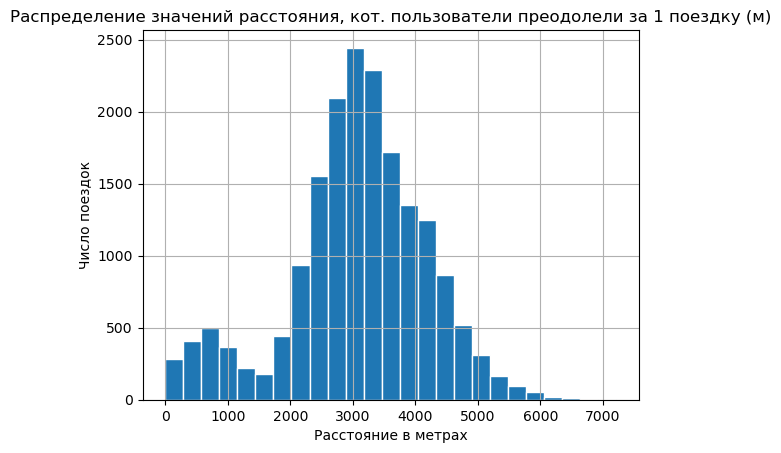

In [97]:
data_rides_go['distance'].hist(bins=25, ec='white', legend=False)
# построение гистограммы для значений в столбце ‘distance’ в датафрейме ‘data_rides_go’
plt.title('Распределение значений расстояния, кот. пользователи преодолели за 1 поездку (м)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Расстояние в метрах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Число поездок', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Самое частое расстояние, которое пользователи сервиса аренды самокатов GoFast преодолели за одну поездку, находится в пределах от 2 км 500 м до 3 км 800 м. Среднее расстояние, которое пользователи сервиса GoFast проехали за одну сессию, составляет 3 км 71 м, медианное расстояние — 3 км 134 м. Некоторые пользователи предпочитают поездки на самокатах на короткие расстояния — до 1 км 500 м. Всех реже пользователи сервиса GoFast ездили на самокатах больше 5 км.

### Продолжительность поездок

Выведем характеристики распределения продолжительностей поездок, совершённых пользователями сервиса аренды самокатов GoFast, и построим диаграмму размаха.

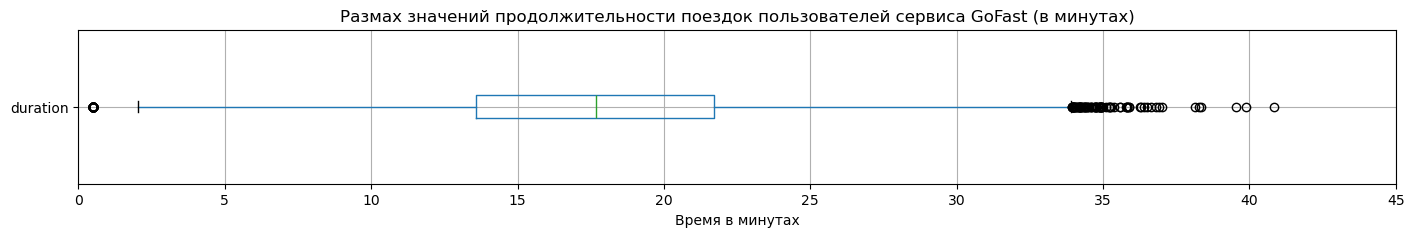

,duration
count,18068.0
mean,17.8
std,6.1
min,0.5
25%,13.6
50%,17.7
75%,21.7
max,40.8


In [101]:
data_rides_go.boxplot('duration', vert = False, figsize=(17, 2))
# построение диаграммы размаха для значений столбца ‘duration’
plt.xlim(0, 45)
# установка границ горизонтальной оси
plt.title('Размах значений продолжительности поездок пользователей сервиса GoFast (в минутах)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Время в минутах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика
round(data_rides_go['duration'].describe().to_frame(), 1)
# вывод статистической информации о значениях столбца ‘duration’

Cредняя продолжительность поездок, совершённых пользователями сервиса GoFast, равна 18 мин.

Стандартное отклонение, описывающее разброс значений продолжительности поездок, совершённых пользователями сервиса GoFast, относительно среднего, равно 6 мин.

Первый квартиль, левее которого лежит 25% данных, описывающих продолжительность поездок, совершённых пользователями сервиса GoFast, равен 14 мин.

Половина всех значений продолжительности поездок, совершённых пользователями сервиса GoFast, меньше 18 мин., другая половина — больше.

Третий квартиль, правее которого лежит 25% данных, описывающих продолжительность поездок, совершённых пользователями сервиса GoFast, равен 22 мин.

Нижний «ус» диаграммы размаха доходит примерно до 2 мин, верхний «ус» — 34 мин. Это приблизительные границы нормального размаха. То, что выходит за их пределы, считается выбросами. Выбросы включают в себя самую быструю поездку — 30 сек. и самую долгую поездку — 41 мин.

Определим, существует ли и чему равна наиболее часто встречающаяся продолжительность поездок, совершённых пользователями сервиса GoFast.

In [103]:
data_rides_go['duration'].mode().to_frame()
# вычисление моды в столбце ‘duration’

,duration
0,0.5


Всех чаще встречается значение продолжительности поездок, совершённых пользователями сервиса GoFast, равное 30 секундам.

Проверим, могла ли короткая сессия быть связана с тем, что человек просто не начал поездку на самокате или проехал очень маленькое расстояние.

In [105]:
round(data_rides_go.query('duration == 0.5')[['distance', 'duration']], 1)
# отбор строк, в которых значение в столбце ‘duration’ равно 0.5 
# создание нового датафрейма со столбцами 'distance' и 'duration', содержащего только отобранные строки

,distance,duration
6531,4196.4,0.5
6570,4830.8,0.5
6680,4684.0,0.5
6695,5215.6,0.5
6768,5197.4,0.5
...,...,...
17004,5531.3,0.5
17242,6724.9,0.5
17314,4445.5,0.5
17505,5722.6,0.5


У поездок на самокате с полуминутной длительностью расстояние составляет более 4 км. В действительности это невозможно. Проверим, существуют ли сессии, длящиеся 30 секунд, с пройденным расстоянием менее 4 км.

In [107]:
len(data_rides_go.query('duration == 0.5 & distance < 4000'))
# подсчёт количества строк в датафрейме ‘data_rides_go’, где истинно условие

0

У всех 95 поездок, длительность которых равна полминуте, расстояние составляет более 4 км. Возможно, продолжительность некоторых поездок была зафиксирована с ошибкой, мобильное приложение неправильно обработало данные.
    
Построим гистограмму распределения продолжительностей поездок, совершённых пользователями сервиса GoFast.

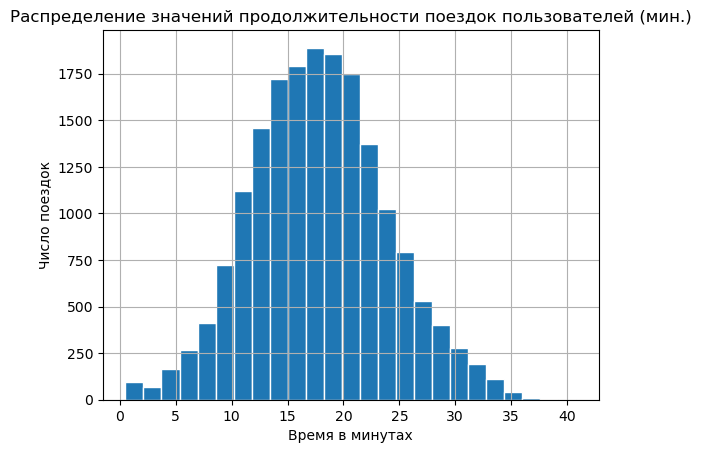

In [109]:
data_rides_go['duration'].hist(bins=25, ec='white', legend=False)
# построение гистограммы для значений в столбце ‘duration’ в датафрейме ‘data_rides_go’
plt.title('Распределение значений продолжительности поездок пользователей (мин.)', fontsize=12)
# установка заголовка для графика
plt.xlabel('Время в минутах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Число поездок', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Набольшее количество поездок совершено пользователями сервиса аренды самокатов GoFast за 15-20 минут. Cредняя и медианная продолжительность поездок, совершённых пользователями сервиса GoFast, приблизительно равна 18 минутам. Всех реже клиенты сервиса GoFast ездили на самокате меньше 7 минут и больше 28 минут.

### Вывод

В результате проведённого исследовательского анализа данных была описана и визуализирована общая информация о пользователях сервиса аренды самокатов GoFast и их поездках.

- Сервис аренды самокатов GoFast представлен в 8 городах, таких как Москва, Екатеринбург, Ростов-на-Дону, Краснодар, Омск, Тюмень, Сочи, Пятигорск. Наибольшее число пользователей сервиса совершают поездки в городе-курорте Пятигорске в Ставропольском крае — 219 чел., наименьшее число в Москве, являющейся столицей и крупнейшим по численности населения городом России — 168 чел. Возможные причины более широкого использования самокатов в Пятигорске по сравнению с Москвой:
 - В Москве может быть более развитая инфраструктура общественного транспорта, что снижает потребность в использовании самокатов, в то время как в Пятигорске инфраструктура может быть менее развита, и самокаты могут служить альтернативой общественному транспорту;
 - В Москве по сравнению с другими городами может быть больше сервисов-конкурентов аренды самокатов, забирающих часть потенциальных клиентов;
 - Москва расположена в более холодном климатическом поясе, что может ограничивать использование самокатов в зимнее время года, Пятигорск же находится в более мягком климате, что делает самокаты более популярными в течение всего года;
 - Пятигорск расположен в гористой местности, что делает использование самокатов более удобным и привлекательным для жителей города, Москва имеет преимущественно равнинный рельеф, что может снижать интерес к самокатам;
 - В Москве могут быть более строгие правила и нормы использования самокатов.

- Более половины (54%) клиентов сервиса аренды самокатов GoFast пользуются мобильным приложением без оформления подписки. Чуть меньше половины (46%) клиентов для совершения поездок на самокатах используют подписку Ultra, но тем не менее это хорошая рабочая база клиентов.
 - Причиной, почему пользователи предпочитают не оформлять подписку, может быть стоимость подписки. Возможно, пользователи считают, что стоимость подписки слишком высока. 
 - Некоторые пользователи не видят необходимости в платной подписке, так как они редко пользуются сервисом. Оформление подписки выгодно, если часто совершаешь поездки на самокате. 
 - Пользователей может привлекать отсутствие абонентской платы за использование приложения, даже несмотря на возможные преимущества оформления платной подписки.

- Количество пользователей сервиса аренды самокатов GoFast в 2021 году составляет около 1.5 тысяч человек. Сервис наиболее популярен среди молодых людей в возрасте от 22 до 28 лет. Cредний, медианный и наиболее распространённый возраст пользователей сервиса равен 25 годам. Реже всего сервисом пользуются лица моложе 15 и старше 35 лет. Самому юному пользователю сервиса — 12 лет, самому старшему — 43 года. 
 - Аренда самокатов наиболее популярна среди молодежи. Самокаты могут быть удобными, стильными, высокоскоростными, что привлекать молодежь. 
 - Самокат может быть небезопасным для детей и пожилых людей из-за их меньшей координации и устойчивости. 
 - Взрослые люди могут предпочитать более традиционные виды транспорта, такие как личный автомобиль или общественный транспорт.
 
- Количество поездок, совершённых пользователями сервиса аренды самокатов GoFast за 2021 год, составляет примерно 18 тысяч. Самое частое расстояние, которое пользователи сервиса аренды самокатов GoFast преодолели за одну поездку, находится в пределах от 2 км 500 м до 3 км 800 м. Среднее расстояние, которое пользователи проехали за одну сессию, составляет 3 км 71 м, медианное расстояние — 3 км 134 м. Некоторая часть пользователей использует самокаты для коротких поездок — до 1 км 500 м. Всех реже пользователи ездили на самокатах больше 5 км. Наименьшее расстояние, которое пользователи преодолели за одну поездку на самокате, равно 0.9 м, наибольшее расстояние — 7 км 211 м.

- Набольшее количество поездок совершено пользователями сервиса аренды самокатов GoFast за 15-20 минут. Cредняя и медианная продолжительность поездок, совершённых пользователями сервиса GoFast, приблизительно равна 18 минутам. Всех реже клиенты сервиса ездили на самокате меньше 7 минут и больше 28 минут. Самая быстрая поездка заняла 30 секунд, самая долгая — 41 минуту. У поездок, длительность которых равна 30 секундам, расстояние составляет более 4 км, что неправдоподобно. Возможно, продолжительность этих поездок была зафиксирована с ошибкой, мобильное приложение неправильно обработало данные.

## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

Проверим размер датафрейма `data_users_go` до объединения.

In [116]:
data_users_go.shape
# вывод количества строк и столбцов в датафрейме ‘data_users_go’

(1534, 5)

Датафрейм с данными о пользователях имеет 1 тыс. 534 строки и 5 столбцов.
    
Проверим размер датафрейма `data_rides_go` до объединения.

In [118]:
data_rides_go.shape
# вывод количества строк и столбцов в датафрейме ‘data_rides_go’

(18068, 5)

Датафрейм с данными о поездках имеет 18 тыс. 68 строк и 5 столбцов.
    
Проверим размер датафрейма `data_subscriptions_go` до объединения.

In [120]:
data_subscriptions_go.shape
# вывод количества строк и столбцов в датафрейме ‘data_subscriptions_go’

(2, 4)

Датафрейм с данными о подписках имеет 2 строки и 4 столбца.

Объединим данные о пользователях сервиса аренды самокатов GoFast, поездках и подписках в один датафрейм.

In [123]:
data = data_users_go.merge(data_rides_go, on='user_id', how='outer').merge(data_subscriptions_go, 
                                                                        on='subscription_type')
# объединение ‘data_users_go’ и ‘data_rides_go’ по столбцу ‘user_id’
# объединение результирующего датафрейма с ‘data_subscriptions_go’ по столбцу ‘subscription_type’
# получение датафрейма ‘data’, содержащего данные из всех трёх исходных датафреймов
data.head()
# отображение первых 5 строк датафрейма ‘data’

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Проверим размер результирующего датафрейма `data`.

In [125]:
data.shape
# вывод количества строк и столбцов в датафрейме ‘data’

(18068, 12)

Датафрейм с данными о пользователях, поездках и подписках имеет 18 тыс. 68 строк и 12 столбцов. Это позволяет сделать вывод, что данные собраны в один датафрейм корректно, учитывая тип объединения. Датафреймы `data_users_go` (1 тыс. 534 строки и 5 столбцов) и `data_rides_go` (18 тыс. 68 строк и 5 столбцов) были объединены по столбцу `'user_id'` (1 общий столбец) — получилось 18 тыс. 68 строк и 9 столбцов. Результирующий датафрейм (18 тыс. 68 строк и 9 столбцов) и `data_subscriptions_go` (2 строки и 4 столбца) были объединены по столбцу `'subscription_type'` (1 общий столбец) — получилось 18 тыс. 68 строк и 12 столбцов.

### Создание датафрейма c данными о пользователях без подписки

Создадим датафрейм на основе датафрейма `data`c данными о пользователях без подписки.

In [129]:
data_free_subscription = data.query('subscription_type == "free"')
# извлечение из датафрейма ‘data’ тех строк, где значение в столбце ‘subscription_type’ равно ‘free’
# сохранение полученной выборки в переменную ‘data_free_subscription’
data_free_subscription.head()
# отображение первых 5 строк датафрейма ‘data_free_subscription’

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Определим размер датафрейма `data_free_subscription`.

In [131]:
data_free_subscription.shape
# вывод количества строк и столбцов в датафрейме ‘data_free_subscription’

(11568, 12)

Датафрейм с данными о пользователях без подписки имеет 11 тыс. 568 строк и 12 столбцов.

### Создание датафрейма c данными о пользователях с подпиской

Создадим датафрейм на основе датафрейма `data` с данными о пользователях с подпиской.

In [135]:
data_ultra_subscription = data.query('subscription_type == "ultra"')
# извлечение из датафрейма ‘data’ тех строк, где значение в столбце ‘subscription_type’ равно ‘ultra’
# сохранение полученной выборки в переменную ‘data_ultra_subscription’
data_ultra_subscription.head()
# отображение первых 5 строк датафрейма ‘data_ultra_subscription’

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Определим размер датафрейма `data_ultra_subscription`.

In [137]:
data_ultra_subscription.shape
# вывод количества строк и столбцов в датафрейме ‘data_ultra_subscription’

(6500, 12)

Датафрейм с данными о пользователях с подпиской имеет 6 тыс. 500 строк и 12 столбцов.

### Расстояние, которое пользователи без подписки преодолели за одну поездку

Выведем характеристики распределения расстояний, которые пользователи сервиса GoFast без подписки преодолели за одну поездку, и построим диаграмму размаха.

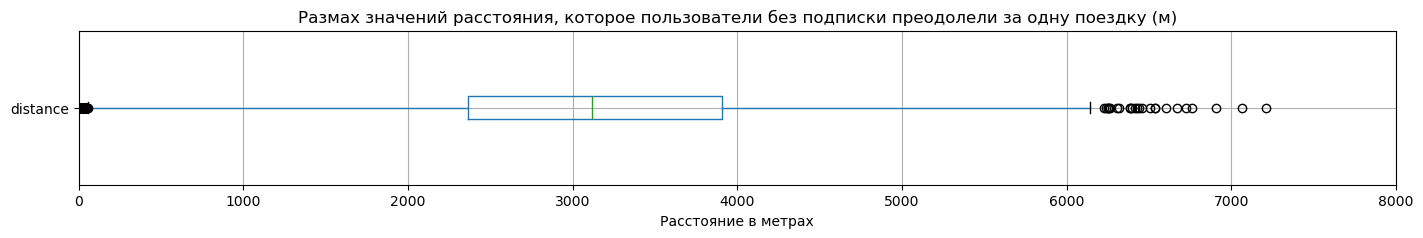

,distance
count,11568.0
mean,3045.5
std,1246.2
min,0.9
25%,2366.6
50%,3114.6
75%,3905.7
max,7211.0


In [141]:
data_free_subscription.boxplot('distance', vert = False, figsize=(17, 2))
# построение диаграммы размаха для значений столбца ‘distance’
plt.xlim(0, 8000)
# установка границ горизонтальной оси
plt.title('Размах значений расстояния, которое пользователи без подписки преодолели за одну поездку (м)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Расстояние в метрах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика
round(data_free_subscription['distance'].describe().to_frame(), 1)
# вывод статистической информации о значениях столбца ‘distance’

Количество поездок, совершённых пользователями сервиса аренды самокатов GoFast без подписки за 2021 год, составляет 11 тыс. 568.
    
Cреднее расстояние, которое пользователи без подписки преодолели за одну поездку, равно 3 км 46 м.

Стандартное отклонение, описывающее разброс значений расстояния, которое пользователи без подписки преодолели за одну поездку, относительно среднего, равно 1 км 246 м.

Первый квартиль, левее которого лежит 25% данных, описывающих расстояние, которое пользователи без подписки проехали за одну сессию, равен 2 км 367 м.

Половина всех значений расстояния, которое пользователи без подписки преодолели за одну поездку, меньше 3 км 115 м, другая половина — больше.

Третий квартиль, правее которого лежит 25% данных, описывающих расстояние, которое пользователи без подписки проехали за одну сессию, равен 3 км 906 м.

Нижний «ус» диаграммы размаха доходит примерно до 50 м, верхний «ус» — 6 км 200 м. Это приблизительные границы нормального размаха. То, что выходит за их пределы, считается выбросами. Выбросы включают в себя наименьшее расстояние — 0.9 м и наибольшее расстояние — 7 км 211 м.
    
Построим гистограмму распределения расстояний, которые пользователи сервиса GoFast без подписки преодолели за одну поездку.

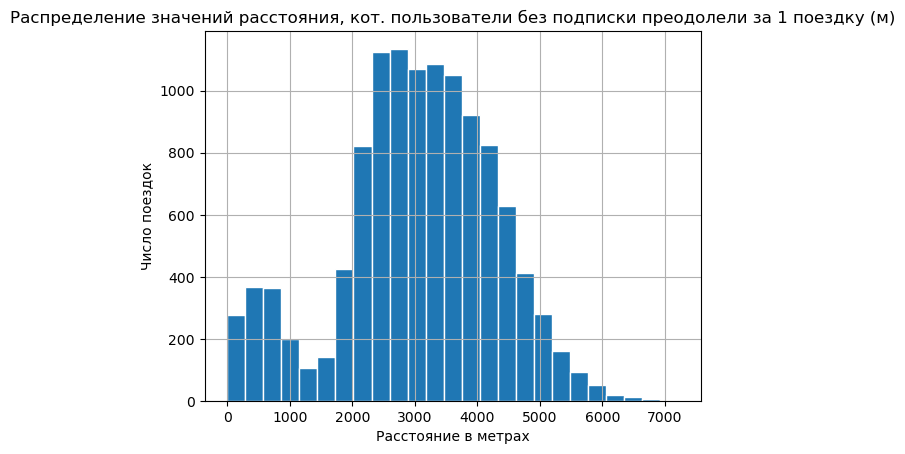

In [143]:
data_free_subscription['distance'].hist(bins=25, ec='white', legend=False)
# построение гистограммы для значений в столбце ‘distance’ в датафрейме ‘data_free_subscription’
plt.title('Распределение значений расстояния, кот. пользователи без подписки преодолели за 1 поездку (м)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Расстояние в метрах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Число поездок', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Самое частое расстояние, которое клиенты сервиса аренды самокатов GoFast преодолели за одну поездку, воспользовавшись мобильным приложением без подписки, находится в пределах от 2 км 350 м до 3 км 700 м. Среднее расстояние, которое пользователи сервиса GoFast без подписки проехали за одну сессию, составляет 3 км 46 м, медианное расстояние — 3 км 115 м. Всех реже пользователи сервиса GoFast без подписки ездили на самокате больше 5 км 700 м.

### Расстояние, которое пользователи с подпиской преодолели за одну поездку

Выведем характеристики распределения расстояний, которые пользователи сервиса GoFast с подпиской преодолели за одну поездку, и построим диаграмму размаха.

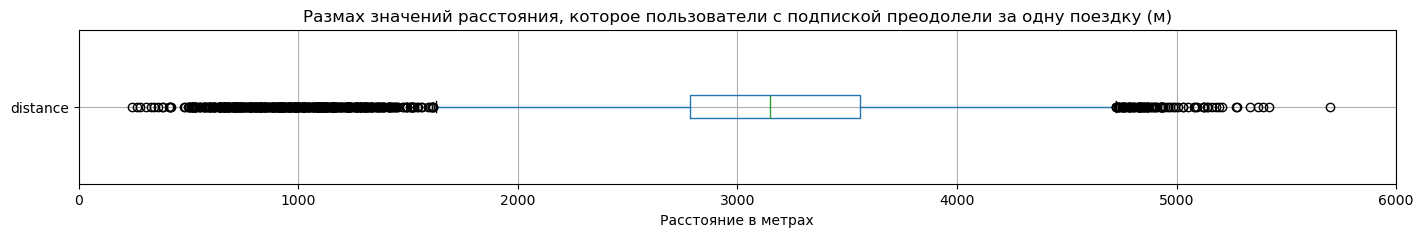

,distance
count,6500.0
mean,3115.4
std,836.9
min,244.2
25%,2785.4
50%,3148.6
75%,3560.6
max,5699.8


In [147]:
data_ultra_subscription.boxplot('distance', vert = False, figsize=(17, 2))
# построение диаграммы размаха для значений столбца ‘distance’
plt.xlim(0, 6000)
# установка границ горизонтальной оси
plt.title('Размах значений расстояния, которое пользователи с подпиской преодолели за одну поездку (м)', fontsize=12)
# установка заголовка для графика
plt.xlabel('Расстояние в метрах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика
round(data_ultra_subscription['distance'].describe().to_frame(), 1)
# вывод статистической информации о значениях столбца ‘distance’

Количество поездок, совершённых пользователями сервиса аренды самокатов GoFast с подпиской за 2021 год, составляет 6.5 тыс.
    
Cреднее расстояние, которое пользователи с подпиской преодолели за одну поездку, равно 3 км 115 м.

Стандартное отклонение, описывающее разброс значений расстояния, которое пользователи с подпиской преодолели за одну поездку, относительно среднего, равно 837 м.

Первый квартиль, левее которого лежит 25% данных, описывающих расстояние, которое пользователи с подпиской проехали за одну сессию, равен 2 км 785 м.

Половина всех значений расстояния, которое пользователи с подпиской преодолели за одну поездку, меньше 3 км 149 м, другая половина — больше.

Третий квартиль, правее которого лежит 25% данных, описывающих расстояние, которое пользователи с подпиской проехали за одну сессию, равен 3 км 561 м.

Нижний «ус» диаграммы размаха доходит примерно до 1 км 600 м, верхний «ус» — 4 км 700 м. Это приблизительные границы нормального размаха. То, что выходит за их пределы, считается выбросами. Выбросы включают в себя наименьшее расстояние — 244 м и наибольшее расстояние — 5 км 700 м.

Построим гистограмму распределения расстояний, которые пользователи сервиса GoFast с подпиской преодолели за одну поездку.

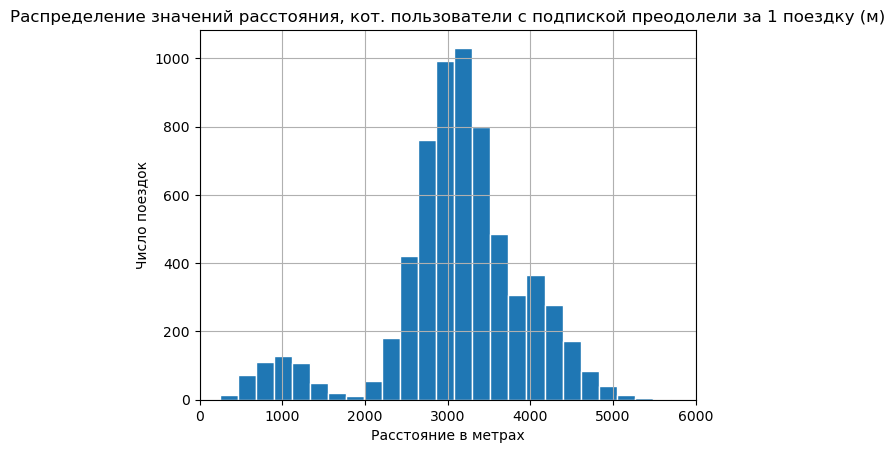

In [149]:
data_ultra_subscription['distance'].hist(bins=25, ec='white', legend=False)
# построение гистограммы для значений в столбце ‘distance’ в датафрейме ‘data_ultra_subscription’
plt.xlim(0, 6000)
# установка границ горизонтальной оси
plt.title('Распределение значений расстояния, кот. пользователи с подпиской преодолели за 1 поездку (м)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Расстояние в метрах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Число поездок', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Самое частое расстояние, которое пользователи сервиса аренды самокатов GoFast с подпиской преодолели за одну поездку, находится в пределах от 2 км 800 м до 3 км 250 м. Среднее расстояние, которое пользователи с подпиской проехали за одну сессию, составляет 3 км 115 м, медианное расстояние — 3 км 149 м. Всех реже пользователи с подпиской ездили на самокате меньше 2 км 300 м и больше 4 км 600 м.

Пользователи сервиса GoFast без подписки совершили почти в два раза больше поездок на самокате (11.6 тыс. поездок), чем подписчики (6.5 тыс. поездок).

В среднем пользователи с подпиской проехали за один раз на 69 м больше, чем пользователи, не имеющие подписку. Медианное расстояние на 34 м больше у пользователей с подпиской, чем у пользователей без неё.

Разброс значений расстояния относительно среднего меньше у подписчиков (стандартное отклонение на 409 м меньше), чем у пользователей без подписки. 

Границы размаха расстояния, которое пользователи без подписки проехали за одну сессию, находятся в пределах от 50 м до 6 км 200 м. Границы размаха расстояния, которое подписчики преодолели за одну поездку, находятся в пределах от 1 км 600 м до 4 км 700 м.
    
Наименьшее расстояние, которое преодолели за одну поездку пользователи, не имеющие подписку, равно 0.9 м, наибольшее расстояние — 7 км 211 м. Минимальное расстояние у подписчиков — 244 м, а максимальное — 5 км 700 м.

Для пользователей без подписки в большей степени характерны поездки на короткие расстояния — до 1 км. Также в целом максимальная дальность поездки выше у пользователей без подписки, чем у пользователей с подпиской.

### Продолжительность поездок, совершённых пользователями без подписки

Выведем характеристики распределения продолжительностей поездок, совершённых пользователями сервиса аренды самокатов GoFast без подписки, и построим диаграмму размаха.

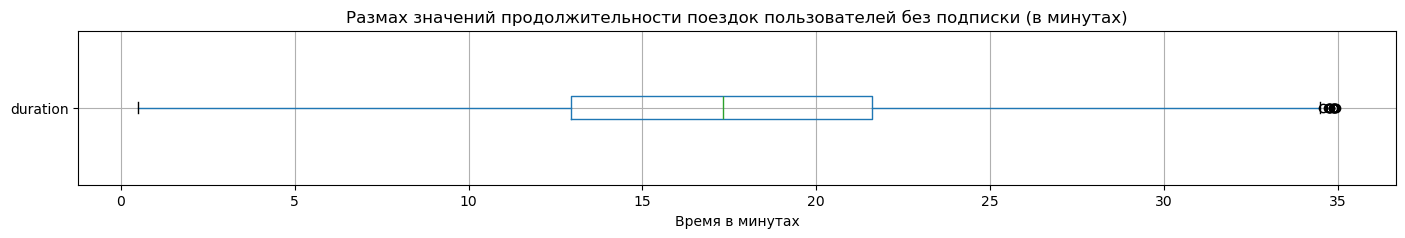

,duration
count,11568.0
mean,17.4
std,6.3
min,0.5
25%,13.0
50%,17.3
75%,21.6
max,34.9


In [154]:
data_free_subscription.boxplot('duration', vert = False, figsize=(17, 2))
# построение диаграммы размаха для значений столбца ‘duration’
plt.title('Размах значений продолжительности поездок пользователей без подписки (в минутах)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Время в минутах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика
round(data_free_subscription['duration'].describe().to_frame(), 1)
# вывод статистической информации о значениях столбца ‘duration’

Количество поездок, совершённых пользователями сервиса аренды самокатов GoFast без подписки за 2021 год, составляет 11 тыс. 568.

Cредняя продолжительность поездок, совершённых пользователями без подписки, равна 17 мин.

Стандартное отклонение, описывающее разброс значений продолжительности поездок, совершённых пользователями без подписки, относительно среднего, равно 6.3 мин.

Первый квартиль, левее которого лежит 25% данных, описывающих продолжительность поездок, совершённых пользователями без подписки, равен 13 мин.

Половина всех значений продолжительности поездок, совершённых пользователями без подписки, меньше 17 мин., другая половина — больше.

Третий квартиль, правее которого лежит 25% данных, описывающих продолжительность поездок, совершённых пользователями без подписки, равен 22 мин.

Нижний «ус» диаграммы размаха доходит примерно до 30 сек., что является наименьшей продолжительностью поездок пользователей без подписки. Верхний «ус» доходит до 34 мин — это приблизительная граница нормального размаха. То, что выходит за её пределы, считается выбросом. Выбросы включают в себя самую долгую поездку — 35 мин.

Построим гистограмму распределения продолжительностей поездок, совершённых пользователями сервиса GoFast без подписки.

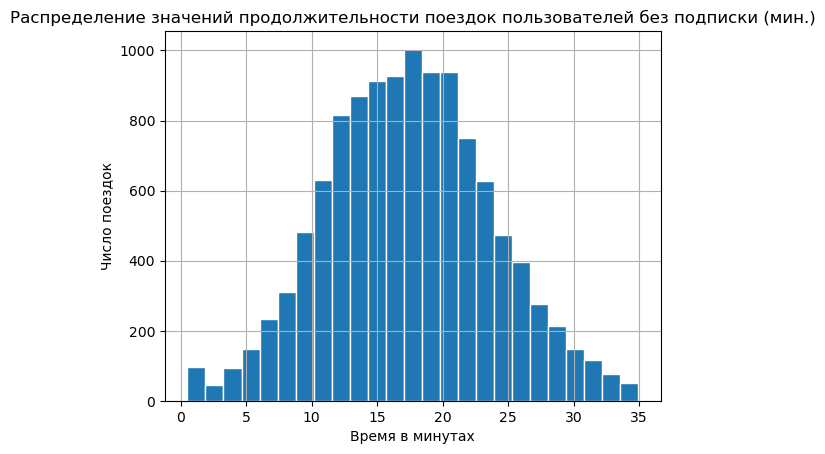

In [156]:
data_free_subscription['duration'].hist(bins=25, ec='white', legend=False)
# построение гистограммы для значений в столбце ‘duration’ в датафрейме ‘data_free_subscription’
plt.title('Распределение значений продолжительности поездок пользователей без подписки (мин.)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Время в минутах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Число поездок', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Набольшее количество поездок совершено пользователями сервиса аренды самокатов GoFast без подписки за 11-21 мин. Cредняя и медианная продолжительность поездок, совершённых пользователями без подписки, приблизительно равна 17 мин. Всех реже клиенты сервиса GoFast без подписки ездили на самокате меньше 7 минут и больше 28 минут.

### Продолжительность поездок, совершённых пользователями с подпиской

Выведем характеристики распределения продолжительностей поездок, совершённых пользователями сервиса аренды самокатов GoFast с подпиской, и построим диаграмму размаха.

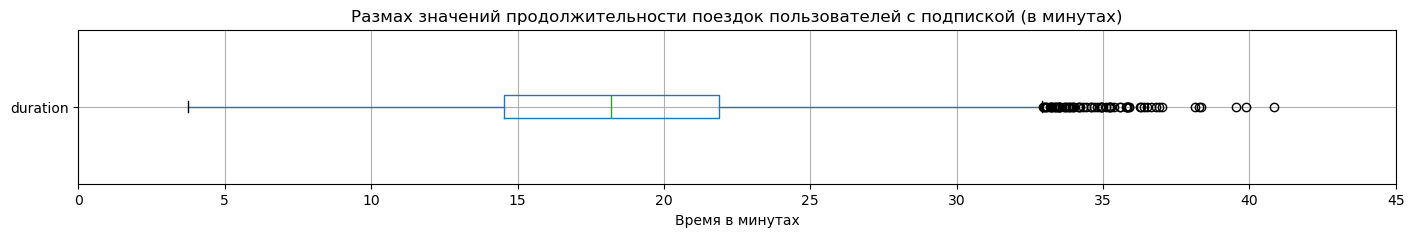

,duration
count,6500.0
mean,18.5
std,5.6
min,3.8
25%,14.5
50%,18.2
75%,21.9
max,40.8


In [160]:
data_ultra_subscription.boxplot('duration', vert = False, figsize=(17, 2))
# построение диаграммы размаха для значений столбца ‘duration’
plt.xlim(0, 45)
# установка границ горизонтальной оси
plt.title('Размах значений продолжительности поездок пользователей с подпиской (в минутах)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Время в минутах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.show()
# отображение графика
round(data_ultra_subscription['duration'].describe().to_frame(), 1)
# вывод статистической информации о значениях столбца ‘duration’

Количество поездок, совершённых пользователями сервиса аренды самокатов GoFast с подпиской за 2021 год, составляет 6.5 тыс.

Cредняя продолжительность поездок, совершённых пользователями с подпиской, равна 19 мин.

Стандартное отклонение, описывающее разброс значений продолжительности поездок, совершённых пользователями с подпиской, относительно среднего, равно 5.6 мин.

Первый квартиль, левее которого лежит 25% данных, описывающих продолжительность поездок, совершённых пользователями с подпиской, равен 15 мин.

Половина всех значений продолжительности поездок, совершённых подписчиками, меньше 18 мин., другая половина — больше.

Третий квартиль, правее которого лежит 25% данных, описывающих продолжительность поездок, совершённых пользователями с подпиской, равен 22 мин.

Нижний «ус» диаграммы размаха доходит примерно до 4 мин., что является наименьшей продолжительностью поездок пользователей с подпиской. Верхний «ус» доходит до 33 мин — это приблизительная граница нормального размаха. То, что выходит за её пределы, считается выбросом. Выбросы включают в себя самую долгую поездку — 41 мин.

Построим гистограмму распределения продолжительностей поездок, совершённых пользователями сервиса GoFast с подпиской.

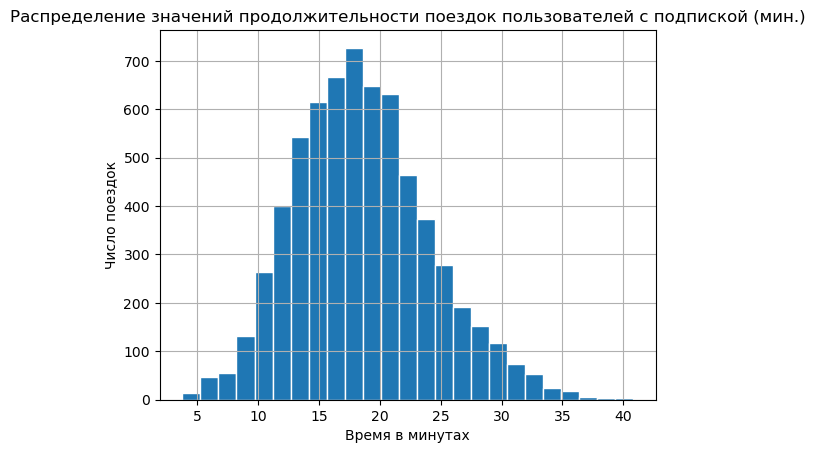

In [162]:
data_ultra_subscription['duration'].hist(bins=25, ec='white', legend=False)
# построение гистограммы для значений в столбце ‘duration’ в датафрейме ‘data_ultra_subscription’
plt.title('Распределение значений продолжительности поездок пользователей с подпиской (мин.)', 
          fontsize=12)
# установка заголовка для графика
plt.xlabel('Время в минутах', fontsize=10)
# установка подписи для горизонтальной оси графика
plt.ylabel('Число поездок', fontsize=10)
# установка подписи для вертикальной оси графика
plt.show()
# отображение графика

Набольшее количество поездок совершено пользователями сервиса аренды самокатов GoFast, имеющими подписку, за 14-22 мин. Cредняя продолжительность поездок, совершённых пользователями с подпиской, приблизительно равна 19 мин., медианная продолжительность — 18 мин. Всех реже клиенты сервиса GoFast с подпиской ездили на самокате меньше 10 минут и больше 28 минут.

Cредняя продолжительность поездок на самокате, совершённых пользователями сервиса GoFast с подпиской, на 2 минуты больше, медианная продолжительность на 1 минуту больше, чем средняя и медианная продолжительность поездок, совершённых пользователями без подписки.

Стандартное отклонение, описывающее разброс значений продолжительности поездок относительно среднего, чуть меньше среди подписчиков (5.6 мин.), чем среди пользователей без подписки (6.3 мин.).

Границы размаха продолжительности поездок, совершённых пользователями, не имеющими подписку, находятся в пределах от 30 сек. до 34 мин. Границы размаха продолжительности поездок, совершённых пользователями, имеющими подписку, находятся в пределах от 4 мин. до 33 мин.

Всех дольше пользователи без подписки ездили на самокате 35 мин., а пользователи с подпиской — 41 мин.

Набольшее количество поездок совершено пользователями без подписки за 11-21 мин, с подпиской — за 14-22 мин. Всех реже клиенты сервиса GoFast без подписки ездили на самокате меньше 7 минут, клиенты с подпиской — меньше 10 минут. 

Можно заключить, что пользователи с подпиской совершают более длительные по времени поездки, чем пользователи, не имеющие платной подписки.

### Вывод

Мы объединили данные о пользователях сервиса аренды самокатов GoFast, поездках и подписках в один датафрейм. 

Создали ещё два датафрейма c данными о пользователях без подписки и о пользователях с подпиской.

Изучили информацию о расстоянии и времени поездок для пользователей без подписки и с подпиской.

- Пользователи сервиса GoFast без подписки совершили почти в два раза больше поездок на самокате (11.6 тыс. поездок), чем подписчики (6.5 тыс. поездок). В среднем пользователи с подпиской проехали за один раз на 69 м больше, чем пользователи, не имеющие подписку. Медианное расстояние на 34 м больше у пользователей с подпиской, чем у пользователей без неё. Стандартное отклонение, описывающее разброс значений расстояния относительно среднего на 409 м меньше у подписчиков, чем у пользователей без подписки. Наименьшее расстояние, которое преодолели за одну поездку пользователи, не имеющие подписку, равно 0.9 м, наибольшее расстояние — 7 км 211 м. Минимальное расстояние у подписчиков — 244 м, а максимальное — 5 км 700 м.

- Набольшее количество поездок совершено пользователями без подписки за 11-21 мин, с подпиской — за 14-22 мин. Cредняя продолжительность поездок на самокате, совершённых пользователями сервиса GoFast с подпиской, на 2 минуты больше, медианная продолжительность на 1 минуту больше, чем средняя и медианная продолжительность поездок, совершённых пользователями без подписки. Стандартное отклонение, описывающее разброс значений продолжительности поездок относительно среднего, чуть меньше среди подписчиков (5.6 мин.), чем среди пользователей без подписки (6.3 мин.). Всех дольше пользователи без подписки ездили на самокате 35 мин., а пользователи с подпиской — 41 мин. Всех реже клиенты сервиса GoFast без подписки ездили на самокате меньше 7 минут, клиенты с подпиской — меньше 10 минут. 

Пользователи с подпиской совершают более длительные по времени поездки, чем пользователи, не имеющие платной подписки. Минимум и максимум на графике пользователей без подписки находятся левее по сравнению с платными пользователями. Это может быть связано с тем, что стоимость минуты использования сервиса выше без подписки, поэтому некоторые пользователи стремятся закончить поездку быстрее.

## Подсчёт выручки

### Округление до следующего целого числа продолжительности каждой поездки

Перед округлением выведем первые 5 наблюдений в столбце с продолжительностью поездки.

In [170]:
round(data['duration'].head().to_frame(), 1)
# отображение первых 5 строк из столбца ‘duration’ в датафрейме ‘data’

,duration
0,25.6
1,15.8
2,6.2
3,18.5
4,26.3


Округлим в большую сторону до целого числа продолжительность каждой поездки в каждой строке датафрейма `data`.

In [172]:
data['duration'] = np.ceil(data['duration']) 
# округление каждого значения из столбца ‘duration’ датафрейма ‘data’ с помощью «потолка»
data['duration'].head().to_frame()
# отображение первых 5 строк из столбца ‘duration’ в датафрейме ‘data’

,duration
0,26.0
1,16.0
2,7.0
3,19.0
4,27.0


### Создание датафрейма с агрегированными данными о поездках

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма `data`: с количеством, суммарным расстоянием и временем поездок, а также типом подписки для каждого пользователя за каждый месяц.

In [175]:
agg_data = data.pivot_table(index=['user_id', 'month'], 
                            values=['distance', 'duration',
                                    'subscription_type'], 
                            aggfunc={'distance': ['count','sum'],
                                     'duration': ['sum'],
                                     'subscription_type': ['min']})
# создание сводной таблицы на основе датафрейма ‘data’
# группировка данных по столбцам ‘user_id’ и ‘month’
# возвращение количества вхождений в таблицу для каждого уникального значения в столбце ‘distance’
# суммирование значений в столбцах ‘distance’, ‘duration’
# вычисление минимального значения для столбца ‘subscription_type’
agg_data.columns = ['number_of_trips', 'total_distance', 
                    'total_duration', 'subscription_type']
# создание списка с названиями столбцов для таблицы ‘agg_data’, который передаётся в атрибут ‘columns’
agg_data.head()
# отображение первых 5 строк датафрейма ‘agg_data’

number_of_trips  total_distance  total_duration  \
user_id month                                                    
1       1                    2     7027.511294            42.0   
        4                    1      754.159807             7.0   
        8                    2     6723.470560            46.0   
        10                   2     5809.911100            32.0   
        11                   3     7003.499363            56.0   

              subscription_type  
user_id month                    
1       1                 ultra  
        4                 ultra  
        8                 ultra  
        10                ultra  
        11                ultra

Перед рассчётом выручки проверим, есть ли пропуски в столбцах датафрейма `agg_data`.

In [177]:
agg_data.isna().sum().to_frame(name='count')
# вычисление количества отсутствующих значений в каждом столбце датафрейма ‘agg_data’

,count
number_of_trips,0
total_distance,0
total_duration,0
subscription_type,0


Во всех столбцах датафрейма с агрегированными данными о поездках отсутствуют пропущенные значения.

### Добавление в датафрейм столбца с помесячной выручкой, которую принёс каждый пользователь

Добавим в датафрейм `agg_data` столбец с помесячной выручкой, которую принёс каждый пользователь без подписки и с подпиской.

In [181]:
def income(row): # определение функции
    try:
        if row['subscription_type'] == 'free':
            return ((50 * row['number_of_trips']) + (8 * row['total_duration']))
        elif row['subscription_type'] == 'ultra':
            return ((6 * row['total_duration']) + 199)
    except:
        print('Не получилось вычислить помесячную выручку')
agg_data['monthly_income'] = agg_data.apply(income, axis=1)
# вычисление помесячной выручки для каждой строки в таблице
# формула: (стоимость старта поездки × количество поездок) + 
# (стоимость одной минуты поездки × общая продолжительность всех поездок в минутах) + 
# стоимость подписки
agg_data.head()
# отображение первых 5 строк датафрейма ‘agg_data’

number_of_trips  total_distance  total_duration  \
user_id month                                                    
1       1                    2     7027.511294            42.0   
        4                    1      754.159807             7.0   
        8                    2     6723.470560            46.0   
        10                   2     5809.911100            32.0   
        11                   3     7003.499363            56.0   

              subscription_type  monthly_income  
user_id month                                    
1       1                 ultra           451.0  
        4                 ultra           241.0  
        8                 ultra           475.0  
        10                ultra           391.0  
        11                ultra           535.0

### Подсчёт выручки от пользователей без подписки и с подпиской

Рассчитаем общую выручку за год, помесячную среднюю и медианную выручку от тех, у кого нет подписки, и от подписчиков.

In [184]:
monthly_income_data = agg_data.pivot_table(index=['subscription_type'], 
                            values=['monthly_income'], 
                            aggfunc=['count', 'sum', 'mean', 'median'])
# создание сводной таблицы на основе датафрейма ‘agg_data’
# группировка данных по столбцу ‘subscription_type’
# возвращение количества вхождений в таблицу каждого значения столбца ‘monthly_income’
# суммирование значений в столбце ‘monthly_income’
# вычисление среднего значения для столбца ‘monthly_income’
# вычисление медианы для столбца ‘monthly_income’
monthly_income_data.columns = ['count', 'sum', 'mean', 'median']
# создание списка с названиями столбцов для таблицы ‘monthly_income_data’, 
# который передаётся в атрибут ‘columns’
round(monthly_income_data)
# отображение датафрейма ‘monthly_income_data’

,count,sum,mean,median
subscription_type,,,,
free,6798,2234104.0,329.0,274.0
ultra,4533,1644537.0,363.0,337.0


Количество помесячной выручки, которую принёс каждый пользователь сервиса аренды самокатов GoFast без подписки, — 6798, с подпиской — 4533. Выручка от пользователей без подписки за 2021 год составила 2 млн. 234 тыс. 104 руб., от подписчиков — 1 млн. 644 тыс. 537 руб. Помесячная средняя выручка от пользователя с подпиской составляет 363 руб., что на 34 руб. больше, чем от пользователя без подписки. Помесячная медианная выручка от пользователя с подпиской составляет 337 руб., что на 63 руб. больше, чем от пользователя без подписки.

### Вывод

- Создали датафрейм с агрегированными данными о поездках, совершённых пользователями сервиса аренды самокатов GoFast. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Продолжительность каждой поездки в каждой строке датафрейма округлили до следующего целого числа.
- Добавили столбец с помесячной выручкой, которую принёс каждый пользователь.
- Рассчитали выручку от пользователей без подписки и с подпиской. Общая выручка от пользователей без подписки выше за счёт большей численности таких пользователей и большего числа совершённых ими поездок. Однако помесячная средняя и медианная выручка выше от пользователей с подпиской, чем от пользователей без неё.

## Проверка гипотез

### Гипотеза: «пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки»

Выявим, тратят ли пользователи сервиса аренды самокатов GoFast с подпиской больше времени на поездки. Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
    
- Нулевая гипотеза: средние значения продолжительностей поездок пользователей с подпиской и без подписки равны.
- Альтернативная гипотеза: среднее значение продолжительностей поездок пользователей с подпиской больше, чем среднее значение продолжительностей поездок пользователей без подписки.

In [191]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, для установки уровня статистической значимости

ultra_subscription_duration = data_ultra_subscription['duration']
# продолжительность поездок пользователей с подпиской

free_subscription_duration = data_free_subscription['duration']
# продолжительность поездок пользователей без подписки

results = st.ttest_ind(ultra_subscription_duration, free_subscription_duration, alternative='greater')
# проведение ttest для двух выборок, 
# использование односторонней гипотезы «больше» в качестве альтернативной

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, чем уровень значимости 
# если это так, то нулевая гипотеза отвергается и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, что нет оснований отвергать нулевую гипотезу

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Полученное значение p-value (1.3e-34) меньше заданного уровня значимости, равного 0.05, поэтому можно отвергнуть нулевую гипотезу. Есть основания утверждать, что пользователи сервиса с подпиской тратят больше времени на поездки на самокате.

### Гипотеза: «среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимальное расстояние с точки зрения износа самоката»

Расстояние одной поездки в 3 км 130 м — оптимальное с точки зрения износа самоката. Проверим, не превышает ли то расстояние, которое проезжают пользователи сервиса GoFast с подпиской за одну поездку, расстояние в 3 км 130 м.
    
- Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку на самокате, равно оптимальному с точки зрения износа самоката расстоянию в 3 км 130 м.
- Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку на самокате, больше оптимального с точки зрения износа самоката расстояния в 3 км 130 м.

In [195]:
optimal_distance = 3130
# создание переменной ‘optimal_distance’, равной 3130, 
# для установки оптимального расстояния с т.з. износа самоката

alpha = 0.05 
# создание переменной ‘alpha’, равной 0.05, для установки уровня статистической значимости

ultra_subscription_distance = data_ultra_subscription['distance']
# расстояние, которое проезжают пользователи с подпиской за одну поездку

results = st.ttest_1samp(
    ultra_subscription_distance, 
    optimal_distance,
      alternative='greater')
# проведение ttest для одной выборки, 
# использование односторонней гипотезы «больше» в качестве альтернативной
 
print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, чем уровень значимости 
# если это так, то нулевая гипотеза отвергается и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, что нет оснований отвергать нулевую гипотезу

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Полученное значение p-value (0.92) больше заданного уровня значимости, равного 0.05, поэтому нельзя отвергнуть нулевую гипотезу. Есть основания утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку на самокате, не превышает оптимальное с точки зрения износа самоката расстояние в 3 км 130 м.

### Гипотеза: «помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки»

Установим, является ли помесячная выручка от пользователей сервиса GoFast с подпиской выше, чем выручка от пользователей без подписки.
    
- Нулевая гипотеза: помесячные средние выручки от пользователей с подпиской и от пользователей без подписки равны.
- Альтернативная гипотеза: помесячная средняя выручка от пользователей с подпиской больше, чем помесячная средняя выручка от пользователей без подписки.

In [199]:
alpha = 0.05
# создание переменной ‘alpha’, равной 0.05, для установки уровня статистической значимости

ultra_subscription_monthly_income = agg_data.query('subscription_type == "ultra"')['monthly_income']
# помесячная выручка от пользователей с подпиской

free_subscription_monthly_income = agg_data.query('subscription_type == "free"')['monthly_income']
# помесячная выручка от пользователей без подписки

results = st.ttest_ind(ultra_subscription_monthly_income, 
                       free_subscription_monthly_income, alternative='greater')
# проведение ttest для двух выборок, 
# использование односторонней гипотезы «больше» в качестве альтернативной

print(f'p-value: {results.pvalue}')
# вывод на экран получившегося p-значения

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
# проверка, меньше ли p-значение результатов исследования, чем уровень значимости 
# если это так, то нулевая гипотеза отвергается и выводится соответствующее сообщение
# в противном случае выводится сообщение о том, что нет оснований отвергать нулевую гипотезу

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value (1.9e-31) меньше заданного уровня значимости, равного 0.05, поэтому можно отвергнуть нулевую гипотезу. Есть основания утверждать, что помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

### Гипотеза: «количество обращений в техподдержку снизилось после обновления серверов, с которыми взаимодействует мобильное приложение»

Техническая команда сервиса аренды самокатов GoFast обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

Мы анализируем одну генеральную совокупность, с которой произошли изменения. Необходимо проверить, равны ли средние совокупности до и после этого изменения.

- Нулевая гипотеза: средние значения количества обращений пользователей сервиса аренды самокатов GoFast в техподдержку до и после обновления серверов равны.
- Альтернативная гипотеза: среднее значение количества обращений пользователей в техподдержку после обновления серверов меньше, чем среднее значение количества обращений пользователей в техподдержку до обновления.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel(). Ему передаём наборы данных после и до обновления. Оба набора должны быть одинаковыми по размеру. Указываем alternative='less', чтобы проверить альтернативную гипотезу о том, что истинное среднее генеральной совокупности после изменения меньше, чем истинное среднее генеральной совокупности до изменения.

### Вывод

- Пользователи сервиса аренды самокатов GoFast с подпиской тратят больше времени на поездки на самокате, чем пользователи без подписки, что может приносить больше прибыли компании, так как каждая минута поездки оплачивается.

- Износ самоката может привести к его преждевременному выходу из строя, что может повлечь за собой дополнительные расходы на ремонт или замену. Кроме того, износ может негативно сказаться на безопасности езды, так как изношенные детали могут выходить из строя в самый неподходящий момент. Поэтому важно не превышать оптимальное расстояние при поездке на самокате. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку на самокате, не превышает оптимальное с точки зрения износа самоката расстояние в 3 км 130 м.

- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки. Для увеличения доходов компании стоит привлекать большее число пользователей с подпиской.

- Чтобы проверить гипотезу о равенстве средних значений количества обращений пользователей сервиса аренды самокатов GoFast в техподдержку до и после обновления серверов, с которыми взаимодействует мобильное приложение, необходимо применить метод scipy.stats.ttest_rel() и передать ему наборы данных после и до обновления. Оба набора должны быть одинаковыми по размеру. Следует указать аргумент alternative='less', чтобы проверить альтернативную гипотезу о том, что истинное среднее генеральной совокупности после изменения меньше, чем истинное среднее генеральной совокупности до изменения.

## Общий вывод

Нами было проведено исследование сервиса аренды самокатов GoFast на основе данных о пользователях из нескольких городов, а также об их поездках и подписках. 

В предоставленных данных не были обнаружены пропущенные значения.

Данные с информацией о пользователях были импортированы из файла, содержащего повторяющиеся строки, в результате чего в датафрейме появился 31 явный дубликат, который впоследствии был удалён. В других датафреймах не были найдены дублирующиеся записи.

Строки, где указаны даты совершения поездки, были преобразованы в формат даты в pandas, чтобы иметь возможность выполнять с ними различные операции.

В ходе исследования выявлено, что сервис аренды самокатов GoFast представлен в Москве, Екатеринбурге, Ростове-на-Дону, Краснодаре, Омске, Тюмени, Сочи, Пятигорске. Наибольшее число пользователей сервиса (219 чел.) приходится на город-курорт Пятигорск в Ставропольском крае, наименьшее число (168 чел.) — на Москву, являющуюся столицей и крупнейшим по численности населения городом России.
 - Возможной причиной менее широкого использования самокатов в Москве может служить развитая инфраструктура общественного транспорта, снижающая потребность в самокатах. 
 - В Москве может быть больше сервисов-конкурентов аренды самокатов, «перехватывающих» часть потенциальных клиентов.
 - Москва расположена в более холодном климатическом поясе, что может ограничивать использование самокатов в зимнее время года. Пятигорск находится в более мягком климате, из-за чего самокаты популярны в течение всего года. 
 - Пятигорск расположен в гористой местности, что делает использование самокатов удобным и привлекательным для жителей города. 
 - В Москве также могут быть более строгие правила и нормы использования самокатов.

Количество пользователей сервиса аренды самокатов GoFast в 2021 году составляет около 1.5 тысяч человек. Сервис наиболее популярен среди молодых людей в возрасте от 22 до 28 лет. Cредний, медианный и наиболее распространённый возраст пользователей сервиса равен 25 годам. Реже всего сервисом пользуются лица моложе 15 и старше 35 лет. Самому юному пользователю сервиса — 12 лет, самому старшему — 43 года. Можно заключить, что целевая аудитория сервиса аренды самокатов — молодёжь.
 - Самокаты могут быть удобными, стильными, высокоскоростными, что привлекать молодёжь. 
 - Взрослые люди могут предпочитать более традиционные виды транспорта, такие как личный автомобиль или общественный транспорт.
 - Самокат может быть небезопасным для маленьких детей из-за менее развитых координационных способностей и для пожилых людей в силу возраста.
 
Более половины клиентов сервиса аренды самокатов GoFast (54%) пользуются мобильным приложением без оформления подписки. Чуть меньше половины клиентов (46%) для совершения поездок на самокатах используют подписку Ultra — это хорошая рабочая база клиентов.
 - Причиной, почему пользователи предпочитают не оформлять подписку, может быть относительно высокая стоимость подписки.
 - Некоторые пользователи не видят необходимости в платной подписке, так как они редко пользуются сервисом. Оформление подписки является выгодным при частом совершении поездок на самокате. 
 - Пользователей может привлекать отсутствие абонентской платы за использование приложения, даже несмотря на возможные преимущества оформления платной подписки.

Количество поездок, совершённых пользователями сервиса аренды самокатов GoFast за 2021 год, составляет примерно 18 тысяч. Самое частое расстояние, которое пользователи сервиса GoFast преодолели за одну поездку, находится в пределах от 2 км 500 м до 3 км 800 м. Среднее расстояние, которое пользователи проехали за одну сессию, составляет 3 км 71 м, медианное расстояние — 3 км 134 м. Некоторая часть пользователей использует самокаты для коротких поездок — до 1 км 500 м. Всех реже пользователи ездили на самокатах больше 5 км. Наименьшее расстояние, которое пользователи преодолели за одну поездку на самокате, равно 0.9 м, наибольшее расстояние — 7 км 211 м.

Пользователи сервиса GoFast без подписки совершили почти в два раза больше поездок на самокате за 2021 год, чем подписчики.

В среднем пользователи с подпиской проехали за один раз на 69 м больше, чем пользователи, не имеющие подписку. Наименьшее расстояние, которое преодолели за одну поездку подписчики, равно 244 м, наибольшее расстояние — 5 км 700 м.

Для пользователей без подписки в большей степени характерны короткие поездки — от 0.9 м до 1 км. Также в целом максимальная дальность поездки выше у пользователей без подписки — более 6 км, чем у пользователей с подпиской.

Набольшее количество поездок совершено пользователями сервиса аренды самокатов GoFast за 15-20 минут. Cредняя и медианная продолжительность поездок, совершённых пользователями сервиса GoFast, приблизительно равна 18 минутам. Всех реже клиенты сервиса ездили на самокате меньше 7 минут и больше 28 минут. Самая быстрая поездка заняла 30 секунд, самая долгая — 41 минуту. 

У поездок, длительность которых равна 30 секундам, расстояние составляет более 4 км, что неправдоподобно. Возможно, продолжительность этих поездок была зафиксирована с ошибкой, мобильное приложение неправильно обработало данные.

Набольшее количество поездок совершено пользователями без подписки за 11-21 мин, с подпиской — за 14-22 мин. Cредняя продолжительность поездок на самокате, совершённых пользователями сервиса GoFast с подпиской, на 2 минуты больше. Всех дольше пользователи без подписки ездили на самокате 35 мин., а пользователи с подпиской — 41 мин. Реже всего клиенты сервиса GoFast без подписки ездили на самокате меньше 7 минут, клиенты с подпиской — меньше 10 минут. Минимум и максимум на графике пользователей без подписки находятся левее по сравнению с платными пользователями. Это может быть связано с тем, что стоимость минуты использования сервиса выше без подписки, поэтому некоторые пользователи стремятся закончить поездку быстрее.

Таким образом, можно сделать вывод, что те, у кого оформлена платная подписка, в среднем проезжают большее расстояние на арендованном самокате и катаются дольше по времени. Оплаченная подписка и тот факт, что с подпиской стоимость одной минуты поездки на 2 рубля дешевле, могут стимулировать подписчиков к более активному использованию самоката. Пользователи сервиса аренды самокатов GoFast с подпиской в среднем тратят больше времени на поездки на самокате, чем пользователи без подписки, что может приносить больше прибыли компании, так как каждая минута поездки оплачивается.

Износ самоката приводит к его преждевременному выходу из строя, что может негативно сказаться на безопасности езды и повлечь за собой дополнительные расходы на ремонт или замену. Поэтому важно не превышать оптимальное расстояние при поездке на самокате. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку на самокате, не превышает оптимальное с точки зрения износа самоката расстояние в 3 км 130 м.

Выручка от пользователей без подписки за 2021 год составила 2 млн. 234 тыс. руб., от подписчиков — 1 млн. 644 тыс. руб. Помесячная средняя выручка от пользователей с подпиской составляет 363 руб., что на 34 руб. больше, чем от пользователей без подписки. Помесячная медианная выручка от пользователей с подпиской составляет 337 руб., что на 63 руб. больше, чем от пользователей без подписки. Можно говорить о том, что общая выручка от пользователей без подписки выше за счёт большей численности таких пользователей и большего числа совершённых ими поездок. Однако помесячная средняя и медианная выручка выше от пользователей с подпиской, чем от пользователей без неё. Для увеличения доходов компании стоит привлекать большее число пользователей с подпиской.

Результаты исследования могут способствовать развитию сервиса аренды самокатов.